In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np


In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Constants
batch_size = 32
num_classes = 4  # Number of classes in your dataset
input_shape = (224, 224, 3)  # Change dimensions as per your dataset images


In [6]:
# Data paths
train_data_dir = '/content/drive/MyDrive/dataset/train'
test_data_dir = '/content/drive/MyDrive/dataset/test'
val_data_dir = '/content/drive/MyDrive/dataset/val'


In [7]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [8]:
# Rescale the test and validation sets without data augmentation
test_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

In [9]:
# Data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1951 images belonging to 4 classes.


In [10]:

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 106 images belonging to 4 classes.


In [11]:
val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 253 images belonging to 4 classes.


In [12]:
# Create the VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)


In [13]:
# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)


In [14]:
# Add a fully-connected layer with softmax activation
predictions = Dense(num_classes, activation='softmax')(x)


In [15]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [16]:
# Freeze the VGG16 layers for training
for layer in base_model.layers:
    layer.trainable = False

In [17]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Print the model summary
model.summary()


In [19]:
# Train the model with 20 epochs and using generators
epochs = 20
history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=epochs
)

Epoch 1/20
61/61 [==============================] - 99s 2s/step - loss: 1.2275 - accuracy: 0.4434 - val_loss: 1.1466 - val_accuracy: 0.4190
Epoch 2/20
61/61 [==============================] - 34s 556ms/step - loss: 1.0170 - accuracy: 0.5864 - val_loss: 0.9690 - val_accuracy: 0.5099
Epoch 3/20
61/61 [==============================] - 34s 553ms/step - loss: 0.8930 - accuracy: 0.6658 - val_loss: 0.8586 - val_accuracy: 0.6126
Epoch 4/20
61/61 [==============================] - 33s 532ms/step - loss: 0.8018 - accuracy: 0.7324 - val_loss: 0.7433 - val_accuracy: 0.7787
Epoch 5/20
61/61 [==============================] - 33s 533ms/step - loss: 0.7235 - accuracy: 0.7811 - val_loss: 0.6841 - val_accuracy: 0.7905
Epoch 6/20
61/61 [==============================] - 34s 552ms/step - loss: 0.6788 - accuracy: 0.7975 - val_loss: 0.6392 - val_accuracy: 0.7866
Epoch 7/20
61/61 [==============================] - 33s 537ms/step - loss: 0.6434 - accuracy: 0.8042 - val_loss: 0.5914 - val_accuracy: 0.8261
Ep

In [20]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)

4/4 [==============================] - 57s 19s/step - loss: 0.4034 - accuracy: 0.8396
Test accuracy: 0.8396226167678833


In [21]:
model.save('cotton_disease_detection_VGG_16.h5')

In [22]:
!pip install matplotlib

In [23]:
import matplotlib.pyplot as plt

In [24]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

In [25]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

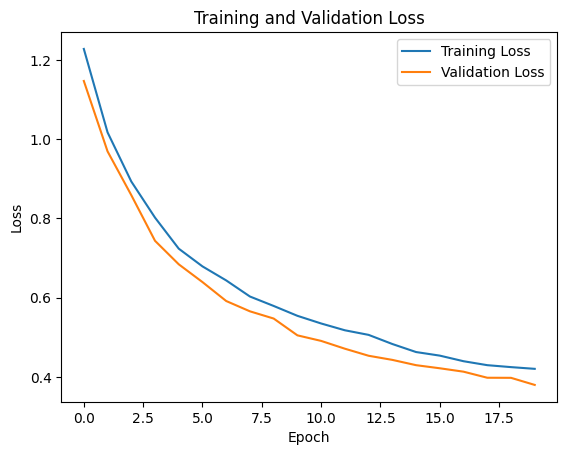

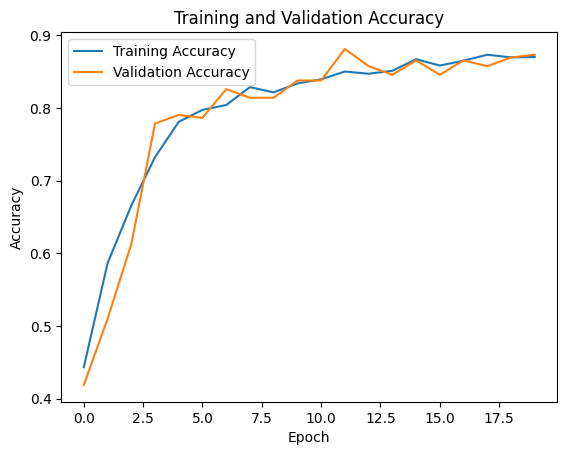

In [26]:
plot_loss(history)
plot_accuracy(history)

In [27]:
plt.tight_layout()
plt.show()
plt.savefig('AccVal_acc')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [39]:
def predict_cotton_disease(image_path):
    img = load_img(image_path, target_size=(input_shape[0], input_shape[1]))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    class_indices = train_generator.class_indices
    predicted_class = list(class_indices.keys())[np.argmax(prediction)]

    plt.imshow(img)
    plt.axis('off')
    plt.title("Prediction: " + predicted_class)
    plt.show()

    return predicted_class

1/1 [==============================] - 0s 21ms/step


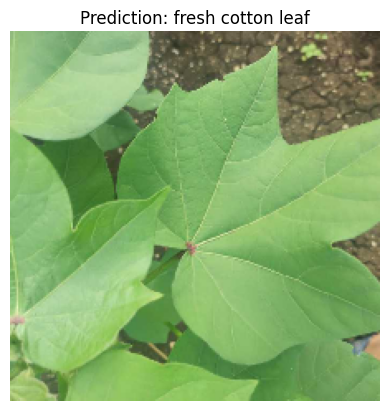

Prediction: fresh cotton leaf


In [41]:
# Provide the path of the image you want to test
test_image_path = '/content/drive/MyDrive/dataset/test/fresh cotton leaf/d (122)_iaip.jpg'
result = predict_cotton_disease(test_image_path)
print("Prediction:", result)